In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib as plt
import matplotlib.pyplot as pyplt
import matplotlib.image as mpimg

In [3]:
import wget
import time
import os
import copy

In [4]:
data_root = "/home/ubuntu/datasets/human-protein-atlas/"

In [6]:
# Let's check how the directory structure looks like
!ls -l --block=M $data_root

total 17905M
-rw-rw-r-- 1 ubuntu ubuntu 17890M Feb  2 18:15 human-protein-atlas-image-classification.zip
-rw-r--r-- 1 ubuntu ubuntu     1M Dec 12 01:01 sample_submission.csv
drwxr-xr-x 2 ubuntu ubuntu     4M Feb  5 10:51 test
drwxr-xr-x 2 ubuntu ubuntu    10M Feb  5 10:53 train
-rw-r--r-- 1 ubuntu ubuntu     2M Dec 12 01:18 train.csv


In [7]:
os.chdir(data_root)

Let's explore the individual directories

In [8]:
!ls -l train/ | wc -l

124289


In [11]:
!ls -l train/ | head -10

total 13952180
-rw-r--r-- 1 ubuntu ubuntu  91603 Dec 12 01:18 00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_blue.png
-rw-r--r-- 1 ubuntu ubuntu 144566 Dec 12 01:18 00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_green.png
-rw-r--r-- 1 ubuntu ubuntu 176601 Dec 12 01:18 00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_red.png
-rw-r--r-- 1 ubuntu ubuntu 143621 Dec 12 01:18 00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_yellow.png
-rw-r--r-- 1 ubuntu ubuntu  33993 Dec 12 01:18 000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_blue.png
-rw-r--r-- 1 ubuntu ubuntu  94588 Dec 12 01:18 000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_green.png
-rw-r--r-- 1 ubuntu ubuntu 129766 Dec 12 01:18 000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_red.png
-rw-r--r-- 1 ubuntu ubuntu 133728 Dec 12 01:18 000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_yellow.png
-rw-r--r-- 1 ubuntu ubuntu  50838 Dec 12 01:18 000a9596-bbc4-11e8-b2bc-ac1f6b6435d0_blue.png
ls: write error: Broken pipe


In [30]:
!file train/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_blue.png

train/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_blue.png: PNG image data, 512 x 512, 8-bit grayscale, non-interlaced


In [31]:
!file train/000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_yellow.png

train/000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_yellow.png: PNG image data, 512 x 512, 8-bit grayscale, non-interlaced


Let's look into the test data

In [9]:
!ls -l test/ | wc -l

46809


In [12]:
!ls -l test/ | head -n 10

total 4665880
-rw-r--r-- 1 ubuntu ubuntu  55869 Dec 12 01:01 00008af0-bad0-11e8-b2b8-ac1f6b6435d0_blue.png
-rw-r--r-- 1 ubuntu ubuntu  95969 Dec 12 01:01 00008af0-bad0-11e8-b2b8-ac1f6b6435d0_green.png
-rw-r--r-- 1 ubuntu ubuntu 146895 Dec 12 01:01 00008af0-bad0-11e8-b2b8-ac1f6b6435d0_red.png
-rw-r--r-- 1 ubuntu ubuntu 161112 Dec 12 01:01 00008af0-bad0-11e8-b2b8-ac1f6b6435d0_yellow.png
-rw-r--r-- 1 ubuntu ubuntu  55523 Dec 12 01:01 0000a892-bacf-11e8-b2b8-ac1f6b6435d0_blue.png
-rw-r--r-- 1 ubuntu ubuntu  79492 Dec 12 01:01 0000a892-bacf-11e8-b2b8-ac1f6b6435d0_green.png
-rw-r--r-- 1 ubuntu ubuntu  90047 Dec 12 01:01 0000a892-bacf-11e8-b2b8-ac1f6b6435d0_red.png
-rw-r--r-- 1 ubuntu ubuntu  83968 Dec 12 01:01 0000a892-bacf-11e8-b2b8-ac1f6b6435d0_yellow.png
-rw-r--r-- 1 ubuntu ubuntu  48094 Dec 12 01:01 0006faa6-bac7-11e8-b2b7-ac1f6b6435d0_blue.png
ls: write error: Broken pipe


In [33]:
!file test/00008af0-bad0-11e8-b2b8-ac1f6b6435d0_blue.png

test/00008af0-bad0-11e8-b2b8-ac1f6b6435d0_blue.png: PNG image data, 512 x 512, 8-bit grayscale, non-interlaced


^ It seems we have 4 files per image. Each file is a png image containing 512\*512 pixels for one of the color channels.

In [14]:
train_lab = pd.read_csv('train.csv')

In [15]:
train_lab.shape

(31072, 2)

In [16]:
train_lab.head(7)

,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18
5,001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0,0
6,0020af02-bbba-11e8-b2ba-ac1f6b6435d0,25 2


^ We have multiple targets per image as seen above.

In [17]:
tt = train_lab['Target']

In [19]:
len(tt), type(tt)

(31072, pandas.core.series.Series)

In [25]:
tt2 = tt.str.cat(sep=' ').split(" ")

In [29]:
list(set(tt2))

['12',
 '14',
 '19',
 '25',
 '10',
 '8',
 '4',
 '7',
 '3',
 '23',
 '24',
 '22',
 '9',
 '2',
 '18',
 '17',
 '13',
 '5',
 '26',
 '15',
 '11',
 '21',
 '27',
 '16',
 '0',
 '20',
 '6',
 '1']

In [36]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.shape

(11702, 2)

In [37]:
sample_submission.head(7)

,Id,Predicted
0,00008af0-bad0-11e8-b2b8-ac1f6b6435d0,0
1,0000a892-bacf-11e8-b2b8-ac1f6b6435d0,0
2,0006faa6-bac7-11e8-b2b7-ac1f6b6435d0,0
3,0008baca-bad7-11e8-b2b9-ac1f6b6435d0,0
4,000cce7e-bad4-11e8-b2b8-ac1f6b6435d0,0
5,00109f6a-bac8-11e8-b2b7-ac1f6b6435d0,0
6,001765de-bacd-11e8-b2b8-ac1f6b6435d0,0


In [39]:
# size of test dir data/4 
46808/4

11702.0

^ This matches with out sample_submission dimention

In [40]:
# size of train dir/4
124288/4

31072.0

So we have roughly 75% train data and 25% test data

### Creating Images

In [42]:
image = mpimg.imread(os.path.join(data_root,'train','00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_blue.png'))

In [43]:
type(image), image.shape

(numpy.ndarray, (512, 512))

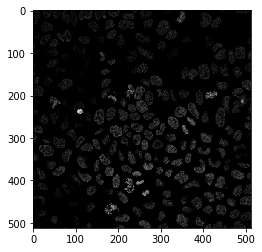

In [44]:
pyplt.imshow(image, cmap = pyplt.get_cmap('gray'))

In [61]:
im_g = mpimg.imread(os.path.join(data_root,'train','00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_green.png')).reshape(512,512,1)
im_y = mpimg.imread(os.path.join(data_root,'train','00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_green.png')).reshape(512,512,1)
im_b = mpimg.imread(os.path.join(data_root,'train','00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_blue.png')).reshape(512,512,1)
im_r = mpimg.imread(os.path.join(data_root,'train','00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_red.png')).reshape(512,512,1)

In [62]:
im_g.shape

(512, 512, 1)

In [63]:
image = np.concatenate((im_g,im_y,im_b,im_r), axis=2)  #[im_g,im_y,im_b,im_r]
image.shape

(512, 512, 4)

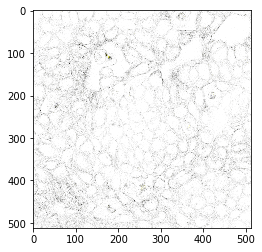

In [64]:
pyplt.imshow(image)

^ This is how an image looks after combining all 4 channels.